# **Topic - ETS (error, trend, seasonal) Model** <br>
### - Edited by Shuangyan Wu 
### 08/04/2022

## **Contents:** <br>
### 1. Introduction of Exponential smoothing and ETS models.
### 2. Simple Exponential smoothing (SES)
### 3. Different ETS models
### 4. Estimation and model selection
### 5. Forecast with ETS models

# 1. Introduction of Exponential Smoothing and ETS Models
Exponential smoothing is often used to generate forecasts that are weighted averages of previous observations. And the weights decrease exponentially for older observations so that more recent observations share higher weights. This method can be used to produce quick and reliable forecasts for a wide range of time series, therefore, is very important and useful for industry applications. <br>

ETS (error, trend, seasonal) models are a family of time series models using exponential smoothing method, which consists of three states: level, trend (none, additive, additive damped), and seasonal (none, additive, multiplicative), i.e., state space models. There are 9 combinations of the states. With an additional error term (additive or multiplicative) for each model, there are total 18 models. 



# 2. Simple exponential smoothing (SES)
Simple exponential smoothing, the simpliest exponential smoothing, can be used to forecast data that has no clear trend or seasonality, for instance, the data shown in the example 1.

**Example 1.** The percentage goods and service exports in total GDP in Algeria.


In [ ]:
install.packages("fpp3")
library("fpp3")

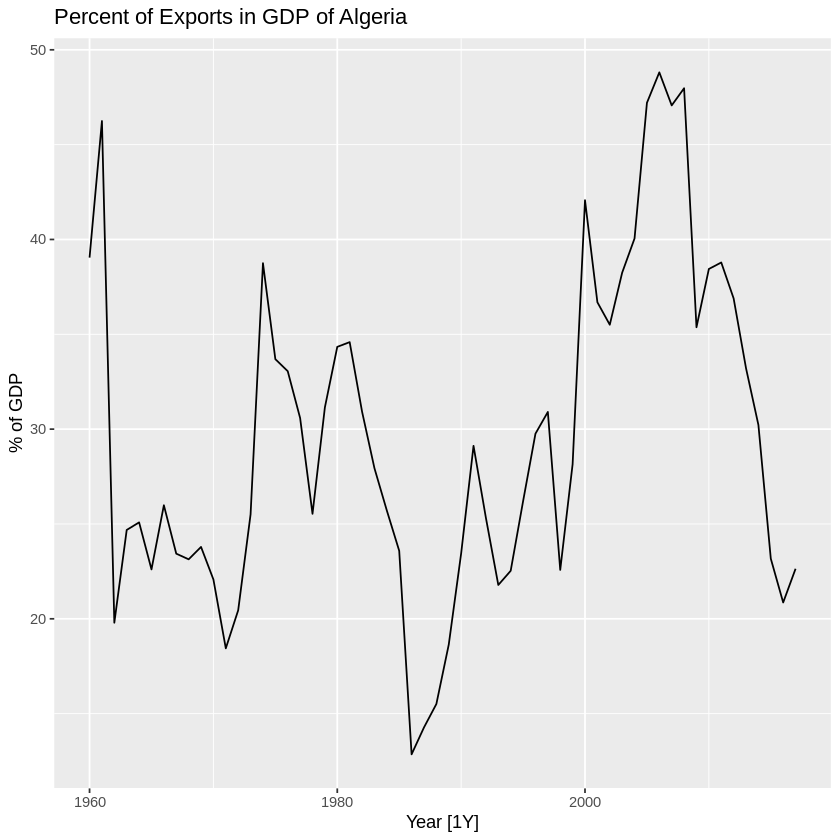

In [ ]:
algeria <- global_economy %>% filter(Country == "Algeria")
algeria2 <- algeria %>% autoplot(Exports) + labs(y = "% of GDP", title = "Percent of Exports in GDP of Algeria")
algeria2

 The one-step-ahead forecast $\hat{y}_{T+1|T}$ is calculated using the weighted average of all previous observations ($y_1...y_T$) as shown in equation (1).
 <br>
Forecasting with SES: $$\hat{y}_{T+1|T} = \alpha y_T + \alpha(1-\alpha) y_{T-1} +\alpha(1-\alpha)^2 y_{T-2} +...\tag{1}, 
$$ <br>
Where $\alpha$ is the smoothing parameter, $0\leq\alpha\leq 1$, it controls the decreasing rate of the weights. When $\alpha$ is small, more weight is given to older observations; when $\alpha$ is large, more weight is given to more recent observations.
<br><br>
For example, 
<br>when $\alpha =0.2$, the coeffecients in equation (1) are 0.2, 0.16, 0.128, 0.1024...; 
<br>when $\alpha =0.8$, the coeffecients in equation (1) are 0.8, 0.16, 0.032, 0.0064...
<br>when $\alpha =1$, $\hat{y}_{T+1|T} = y_T $, which is called Naïve forecast.
<br><br>

The SES form in equation (1) can also be written as equation (2) for large $T$. Where $\hat{y}_{T+1|T}$ is the forecast at time $T$, $\hat{y}_{T|T-1}$ is the previous forecast, and $y_T$ is the observation at $T$. Similarly, the fitted values for the series can be written as equation (3).
<br>
**Weighted Average Form:**

*$$\hat{y}_{T+1|T} = \alpha y_T + (1-\alpha)\hat{y}_{T|T-1}\tag{2}$$*
<br>
$$\hat{y}_{t+1|t} = \alpha y_t + (1-\alpha)\hat{y}_{t|t-1}\tag{3}$$
Where $0\leq\alpha\leq 1$ and $t= 1, 2,3...T$.

Equations (1) and (2) are equal for large $T$ since equation (2) can be expanded as: $$ \hat{y}_{T+1|T}= \sum_{j=0}^{T-1}\alpha (1-\alpha)^jy_{T-j}+ (1-\alpha)^Tl_0
$$
Where $l_0$ is the first fitted value at $t=1$, which has to be estimated. And the second term $(1-\alpha)^Tl_0$ above become very small for large T. 

Apart from the weighted average form, the simple exponential smoothing in equation (1) can also be written as the component form with two equations as shown in equtions (4)-(5). In which, there is only one component: $l_t$ representing the level or smoothed value at time $t$. Later on, more components such as trend ($b_t$) and seasonal ($s_t$) will be introduced.<br>

$$Forecast:  \hat{y}_{t+h|t}=l_t\tag {4}$$
$$Smoothing: l_t=\alpha y_t + (1-\alpha)l_{t-1}\tag{5}$$
<br>
From the forecast equation, we see when $h =1$, $\hat{y}_{t+1|t}$ is the fitted value at time $t+1$, which equals to the estimated level at time $t$. When $t=T$, we get the forecast data beyond the observations, and the forecasts are all equal to $l_T$, the last level at $T$, which is shown in equation (6)  <br>
For $h=1,2,3....$
$$ \hat{y}_{T+h|T}=\hat{y}_{T+1|T}=l_T \tag{6}$$


From the smoothing equation, we see the estimated level at time $t$ is calculated as the weighted average of the observation at time $ t $ and estimated level at time $t-1$. After replacing the $l_t$ with $\hat{y}_{t+1|t}$ and $l_{t-1}$ with $\hat{y}_{t|t-1}$, we get the same exponential smoothing equation as shown in equation (3). 




When applying SES, once the $\alpha$ and the initial value $l_0$ are known, all forecasts can be computed. Compared to subjectively choosing both values, a more reliable way to obtain both values is to minimize the sum of square error (SSE)as shown in equation (7). Th error or residual term is shown in equation (8)<br>
$$SSE= \sum_{t=1}^{T}(y_t-\hat{y}_{t|t-1})^2 =\sum_{t=1}^{T} e_t^2 \tag{7}$$
<br>
$$e_t = y_t - \hat{y}_{t|t-1} =y_t - l_{t-1}\tag{8} $$
**Example:** 

In [ ]:
# Predict for 5 years
model <- algeria_economy %>% model(ETS(Exports ~ error("A") + trend("N") + season("N")))
pred <- model %>% forecast(h = 5)
pred
report(model)

Country,.model,Year,Exports,.mean
<fct>,<chr>,<dbl>,<dist>,<dbl>
Algeria,"ETS(Exports ~ error(""A"") + trend(""N"") + season(""N""))",2018,"N(22, 36)",22.44468
Algeria,"ETS(Exports ~ error(""A"") + trend(""N"") + season(""N""))",2019,"N(22, 61)",22.44468
Algeria,"ETS(Exports ~ error(""A"") + trend(""N"") + season(""N""))",2020,"N(22, 86)",22.44468
Algeria,"ETS(Exports ~ error(""A"") + trend(""N"") + season(""N""))",2021,"N(22, 111)",22.44468
Algeria,"ETS(Exports ~ error(""A"") + trend(""N"") + season(""N""))",2022,"N(22, 136)",22.44468


Series: Exports 
Model: ETS(A,N,N) 
  Smoothing parameters:
    alpha = 0.8399875 

  Initial states:
   l[0]
 39.539

  sigma^2:  35.6301

     AIC     AICc      BIC 
446.7154 447.1599 452.8968 


All 5 forecasts are the same as 22.44 using SES method (flat forecasts). <br>
We get $\hat{\alpha} = 0.84$, and ${l}_0=39.5$ by minimizing SSE for all observation years and restaining $0\leq \alpha \leq 1 $.

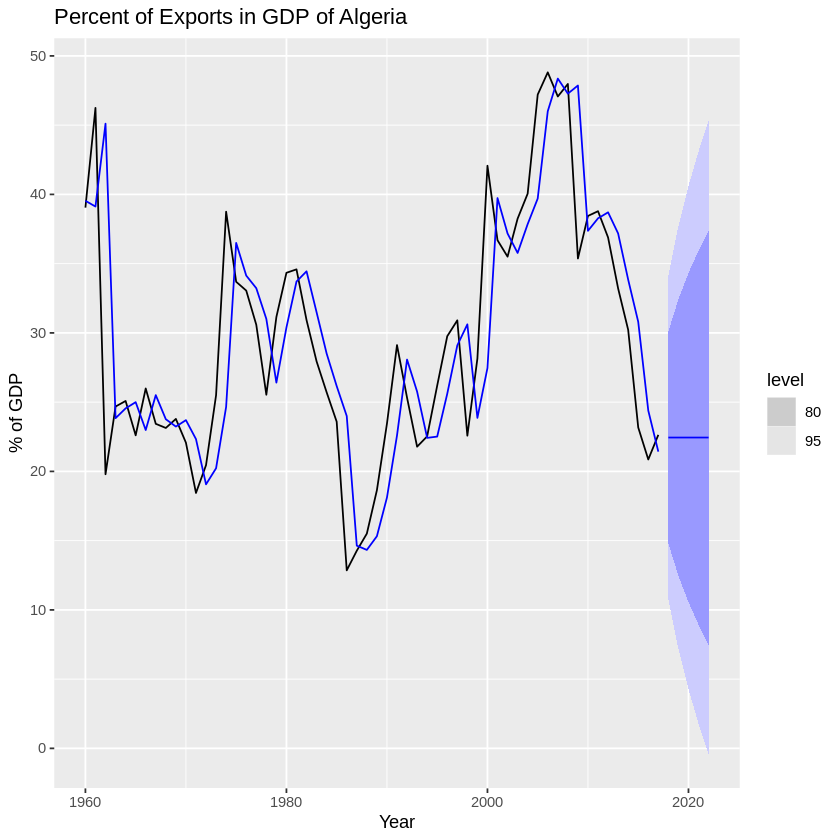

In [ ]:
pred %>% autoplot(algeria_economy) + geom_line(aes(y = .fitted), col = "blue",data = augment(model)) +
  labs(y ="% of GDP", title = "Percent of Exports in GDP of Algeria") 

The prediction intervals (large uncertainty) need to be considered when interpreting the prediction result. 

#3. Different ETS models
Depending on the type of each state in the model, each state space model (states: level, trend, seasonal) can be labeled as ETS(. , . , .) for (error, trend, seasonal) respectively. The options of each component are: Error= {A, M}, Trend= {N, A, Ad} and Seasonal {N, A, M}.

# With state of level: 
## 3.1. ETS (A,N,N) model
Simple exponential smoothing model with additive errors is denoted as ETS(A, N, N). As listed before, the component form of SES model is shown below.  

$$Forecast:  \hat{y}_{t+h|t}=l_t\tag {9}$$
$$Smoothing: l_t=\alpha y_t + (1-\alpha)l_{t-1}\tag{10}$$
<br> And 
$$e_t = y_t - \hat{y}_{t|t-1} =y_t - l_{t-1}\tag{11} $$<br>
For a model with additive model, we assume that $e_t$ is white noise with mean 0 and variance $\sigma^2$. So $e_t = \varepsilon_t\sim NID (0,\sigma^2)$, $NID$ means "normally and independently distribuetd". Since both equations use the same random error term, this model is also an innovations state space model or "a single source of error" model.
<br> <br>
From equations (10) and (11), we can write: 
<br> <br>
Measurement equation: $y_t=l_{t-1}+\varepsilon_t \tag{12}$ <br>
State equation: $l_t=l_{t-1} + \alpha \varepsilon_t \tag{13}$
The measurement equation shows the relationship between the observations and unobserved states. In this case,  the observation $y_t$ shows linear relationship with the level $l_{t-1}$ plus some error. While the state equation presents the revolution of the state (level in this case) through time.




## 3.2. ETS (M,N,N) model

Simple exponential smoothing model with multiplicative errors is denoted as ETS(M, N, N). Similary, we can specify the model multiplicative errors as relative error: 
$$\varepsilon_t = \frac{y_t-\hat{y}_{t|t-1}}{\hat{y}_{t|t-1}}\tag{14}$$
And $\varepsilon_t \sim NID(0,\sigma^2)$. Substituting $\hat{y}_{t|t-1}=l_{t-1}$, we get $y_t=l_{t-1}+l_{t-1}\varepsilon_t$ and $e_t=y_t-\hat{y}_{t|t-1}=l_{t-1}\varepsilon_t$. Combining equation (10), we get: 
$$y_t=l_{t-1} (1+ \varepsilon_t)\tag{15}$$
$$l_t=l_{t-1}(1+\alpha\varepsilon_t)\tag{16}$$

# Adding additional trend:

## 3.3. ETS (A,A,N) model

Holt’s linear trend method with additive error is denoted as ETS(A, A, N) model. To understand this model, we first need to understand Holt’s linear trend method.

Holt’s linear trend method is an extension of simple exponential smoothing, it allows to forecast data with trend. The component form of this method include three equations: one forecast equation and two smoothing equations (Level + Trend) as shown below.
<br>Forecast: 
$$Forecast :  \hat{y}_{t+h|t} = l_t+hb_t \tag{17}$$
$$Level: l_t = \alpha y_t + (1-\alpha)(l_{t-1}+b_{t-1}) \tag{18}$$
$$Trend: b_t = \beta^* (l_t-l_{t-1}) + (1-\beta^*)b_{t-1}\tag{19}$$
Where $l_t$ is the estimate of the level, $b_t$ is the estimate of the trend/slope at time $t$. $\alpha$ and $\beta^*$ are the smoothing parameters for level and trend, respectively. $0\leq \alpha$, $\beta^* \leq 1$.
<br><br> 
The estimated level $l_t$ here is a weighted average of the observation $y_t$ and the forecast at time $t$, that is $(l_{t-1}+b_{t-1})$. The trend $b_t$ is the weighted average of estimated trend at time $t$, that is $(l_t-l_{t-1})$, and the last estimated trend $b_{t-1}$. 
<br><br>
The forecast equation shows the forecast $\hat{y}_{t+h|t}$ equals to the last estimated level plus $h$ times $b_t$, the last estimated trend. The forecasting is not flat anymore like the simple exponential smoothing, but trending. 

**Example: Australian population for model with trend.** 


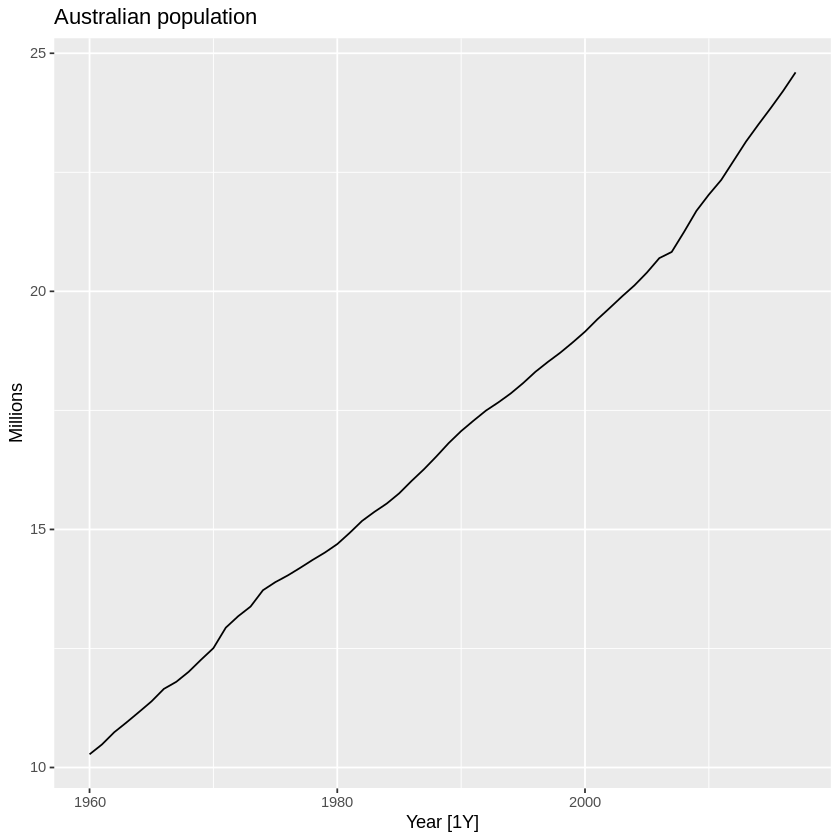

In [ ]:
# 1960-2017
aus <- global_economy %>% filter(Code == "AUS") %>% mutate(Pop = Population / 1e6)
autoplot(aus, Pop) + labs(y = "Millions", title = "Australian population")

In [ ]:
fit <- aus_economy %>% model (AAN = ETS(Pop ~ error("A") + trend("A") + season("N")))
fc <- fit %>% forecast(h = 10)
fc # predicted valued
report(fit) # parameters

Country,.model,Year,Pop,.mean
<fct>,<chr>,<dbl>,<dist>,<dbl>
Australia,AAN,2018,"N(25, 0.0041)",24.96786
Australia,AAN,2019,"N(25, 0.011)",25.33678
Australia,AAN,2020,"N(26, 0.023)",25.70571
Australia,AAN,2021,"N(26, 0.039)",26.07464
Australia,AAN,2022,"N(26, 0.061)",26.44356
Australia,AAN,2023,"N(27, 0.09)",26.81249
Australia,AAN,2024,"N(27, 0.13)",27.18142
Australia,AAN,2025,"N(28, 0.17)",27.55034
Australia,AAN,2026,"N(28, 0.22)",27.91927


Series: Pop 
Model: ETS(A,A,N) 
  Smoothing parameters:
    alpha = 0.9999 
    beta  = 0.3266366 

  Initial states:
     l[0]      b[0]
 10.05414 0.2224818

  sigma^2:  0.0041

      AIC      AICc       BIC 
-76.98569 -75.83184 -66.68347 


$\alpha, \beta^*$, initial $l_0, b_0$ above are estimated by minimising SSE for between the observations and fitted values.

So, after introducing the Holt’s linear trend method, we come back to ETS (A, A, N) model, which is the Holt’s linear trend method with additive errors. Here, we assume the error $\varepsilon_t = y_t - l_{t-1} - b_ {t-1} \sim NID (0, \sigma^2)$. Then using this error equation and equations (18-19), we get:
<br>

$$ y_t=l_{t-1} +b_{t-1} + \varepsilon_t \tag {20}$$ 
$$ l_t = l_{t-1} +b_{t-1} +\alpha\varepsilon_t \tag {21}$$ 
$$ b_t=b_{t-1} + \beta \varepsilon_t \tag {22}$$ 
Where $\beta = \alpha \beta^*$.

## 3.4. ETS (M,A,N) model

Holt’s linear method (Trend) with multiplicative errors is denoted by ETS (M,A,N) model.
<br>
The one-step-ahead error is specificed as relative errors:
$$\varepsilon_t= \frac{y_t-(l_{t-1} + b_{t-1})}{l_{t-1}+b_{t-1}}$$
Similarly, we can get the model component form as: 
$$y_t=(l_{t-1}+b_{t-1})(1+\varepsilon_t)\tag{23}$$
$$l_t=(l_{t-1}+b_{t-1})(1+\alpha \varepsilon_t)\tag{24}$$
$$b_t=b_{t-1}+\beta(l_{t-1}+b_{t-1})\varepsilon_t\tag{25}$$
Where $\beta=\alpha \beta^*$ and $\varepsilon_t \sim NID (0, \sigma^2)$.

# 3.5. ETS (A, Ad, N) and ETS (M, Ad, N)
The damped trend methods with additive errors and multiplicative errors are denoted as ETS (A, Ad, N) and ETS (M, Ad, N), respectively. 
<br><br>
Since the approaches of obtaining the model component forms with additive or multiplicative error terms are similar to the approaches explained for previous ETS models. Here, we only forcus on the introduction of the damped trend methods. A summary table for ETS models with error terms will be presented later.
<br> <br>
Since the Holt’s linear method in section 3.3 and 3.4 generates forecasts with an increasing or decreasing linear trend, the forecasts change towards infinity into the future. This method tends to over-forecast. To solve this problem, a new damping factor $\phi$ is introduced to the model, with which, the forecast line tends to be flat after some time in the future. This revised method is very popular in time series forecast. 
<br>
The component forms for the method:
 $$\hat{y}_{t+h|t}=l_t + (\phi +\phi^2 +...+\phi^h)b_t  $$
 $$l_t=\alpha y_t+(1-\alpha)(l_{t-1}+\phi b_{t-1}) $$
  $$b_t=\beta^*(l_t-l_{t-1})+(1-\beta^*)\phi b_{t-1} $$
  Where $0<\phi<1 $. When $\phi=1$, the model becomes the same as the Holt’s linear method. When h $\rightarrow \infty$, $\hat{y}_{t+h|t}\rightarrow l_t+\phi b_T/(1-\phi)$, which is a constant. So the method ensure the trend for short-run forecast, but converge to a constant for long-run forecast. Since small $\phi$ leads to very strong damping effect and $\phi$ values close to 1 leads to insignificant damping effect, the $\phi$ value is normally restricted to 0.8-0.98. <br><br>
**Example. Australian Population.**

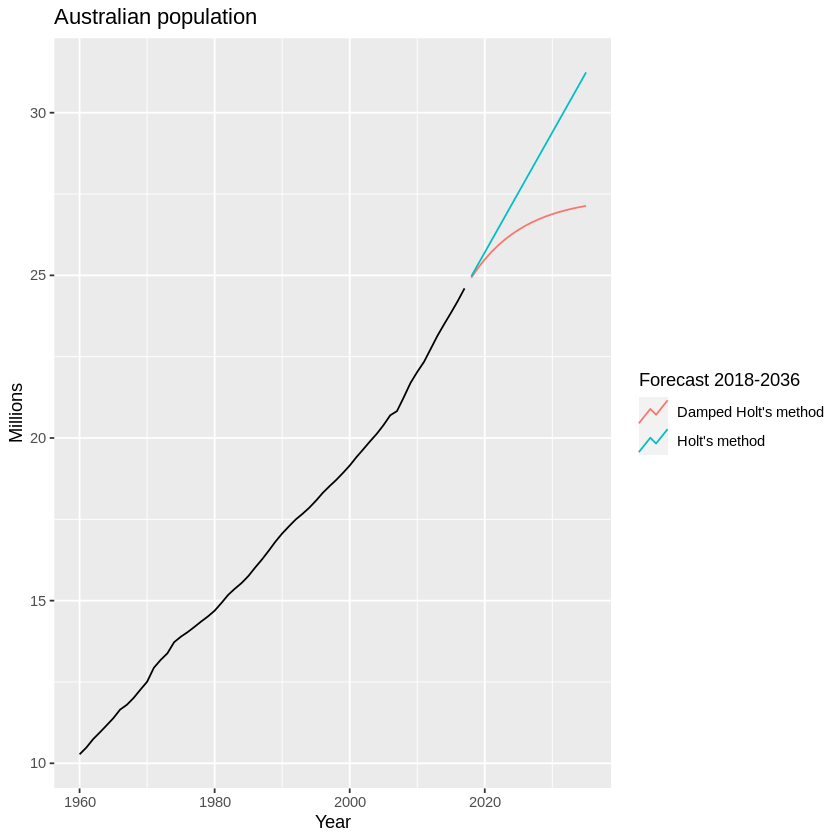

In [ ]:
# Figure shows the forecasts for 2018-2036 from 
# both Holt's linear trend method and damped trend method
aus %>%
  model(
    `Holt's method` = ETS(Pop ~ error("A") +
                       trend("A") + season("N")),
    `Damped Holt's method` = ETS(Pop ~ error("A") +
                       trend("Ad", phi = 0.88) + season("N"))
  ) %>% forecast(h = 18) %>%
  autoplot(aus_economy, level = NULL) +
  labs(title = "Australian population",
       y = "Millions") + guides(colour = guide_legend(title = "Forecast 2018-2036"))

**Example. Internet usage**

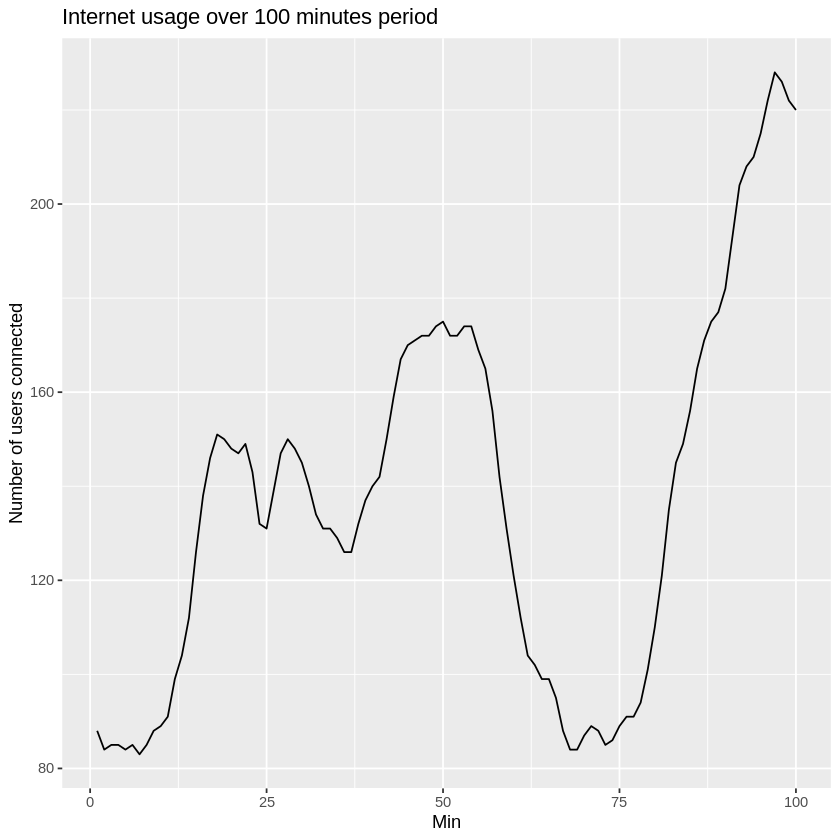

In [ ]:
# The number of users connected to internet via a server over 100 min.
usage <- as_tsibble(www_usage)
usage %>% autoplot(value) + labs(x="Min", y="Number of users connected",
       title = "Internet usage over 100 minutes period")

In [ ]:
# Using ts cross-validation to check the one-step forecast accuracy 
# using three ETS models 
usage %>%
  stretch_tsibble(.init = 10) %>%
  model(
    SES = ETS(value ~ error("A") + trend("N") + season("N")), # level 
    Holt = ETS(value ~ error("A") + trend("A") + season("N")), # level + trend
    Damped = ETS(value ~ error("A") + trend("Ad") +  #level + damped trend
                   season("N"))) %>%
  forecast(h = 1) %>%
  accuracy(usage) # compare MAE or RMSE, damped trend method is better

Warning message:
“The future dataset is incomplete, incomplete out-of-sample data will be treated as missing. 
1 observation is missing at 101”


.model,.type,ME,RMSE,MAE,MPE,MAPE,MASE,RMSSE,ACF1
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Damped,Test,0.28784872,3.686810,2.999724,0.3468877,2.264128,0.6628854,0.6356913,0.3359403
Holt,Test,0.06100635,3.874378,3.174028,0.2442952,2.382212,0.7014035,0.6680322,0.2962490
SES,Test,1.45730972,6.049937,4.813149,0.9035711,3.548391,1.0636199,1.0431489,0.8029695


In [ ]:
# Estimated parameters for damped trend method
modelfit <- usage %>%
  model( Damped = ETS(value ~ error("A") + trend("Ad") + season("N")))

tidy(fit)

.model,term,estimate
<chr>,<chr>,<dbl>
Damped,alpha,0.99989996
Damped,beta,0.99664387
Damped,phi,0.81495803
Damped,l[0],90.35176745
Damped,b[0],-0.01728234


$\alpha$ is close to 1, th level react strongly to new observations. $\beta$ is close to 1, the trend reflects mostly the slope between the most recent 2 minutes based on the equations.

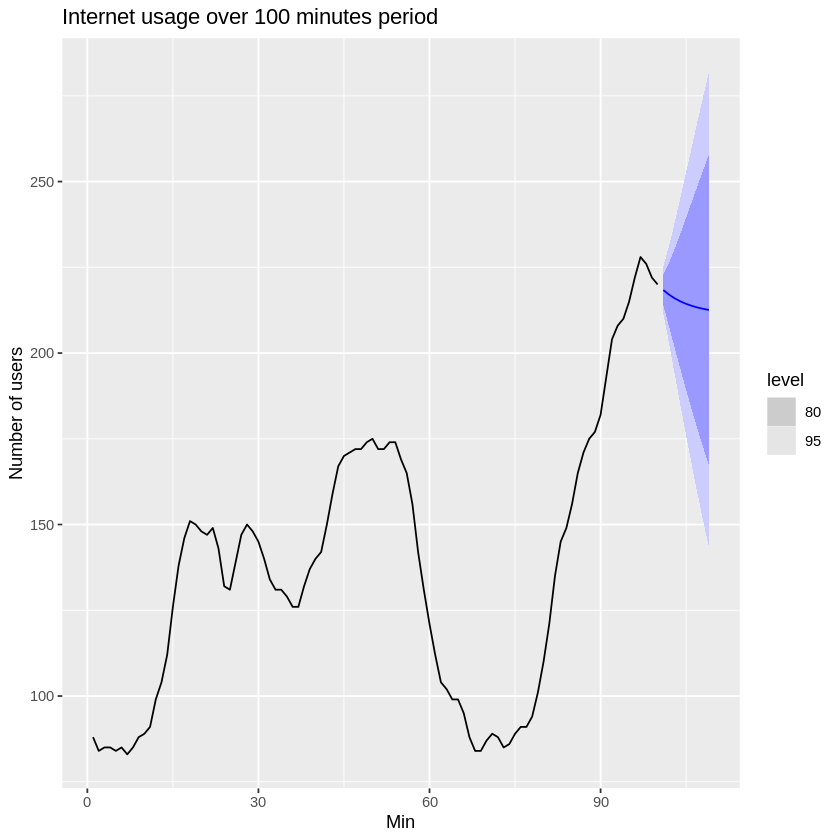

In [ ]:
# Forecast for next 9 minutes with damped trend method, damping factor =0.815, pretty low.
modelfit %>%
  forecast(h = 9) %>% autoplot(usage) +
  labs(x="Min", y="Number of users", title = "Internet usage over 100 minutes period")

# Prediction interval

# Adding additional seasonality: 

## 3.6. ETS (A,A,A) and ETS (M,A,A)
Holt-Winters’ additive method with additive errors and multiplicative errors are denoted as ETS (A, A, N) and ETS (M, A, N), respectively. 
<br><br>
Since the approaches of obtaining the model component forms with additive or multiplicative error terms are similar to the approaches explained for previous ETS models. Here, we only forcus on the introduction of the Holt-Winters’ additive method. A summary table for ETS models with error terms will be presented later. <br> <br>

To capture additional seasonality, Holt and Winters extended Holt's method with a seasonal component $s_t$, the corresponding smoothing parameters is $\gamma$. And $m$ represents the period of seasonality. For example, $m=12$ for monthly data and $m=4$ for quarterly data. When the seasonal variations are approximately constant, we normally use Holt-Winters’ additive method, which has an absolute seasonal component term in the scale of observed data. The component form of the model is shown below: 
<br>

$$\hat{y}_{t+h|t} = l_t+ hb_t+s_{t+h-m(k+1)}$$
$$l_t= \alpha(y_t-s_{t-m})+ (1-\alpha)(l_{t-1}+b_{t-1})$$
$$b_t=\beta^*(l_t-l_{t-1})+(1-\beta^*)b_{t-1}$$
$$s_t=\gamma (y_t-l_{t-1} -b_{t-1}) + (1- \gamma)s_{t-m}$$ <br>
Where $k$ is the integer of (h-1)/m so that the estimate of the seasonality ($s_{t+h-m(k+1)}$) comes from the final sample year. The estimated level $l_t$ is a weighted average of adjusted obervation at $t$ ($y_t-s_{t-m}$) and the forecast at $t$ from other two states ($l_{t-1}+b_{t-1}$). The $b_t$ equation is the same as it in the Holt's linear method. And $s_t$ is weighted average of the current seasonality ($y_t-l_{t-1} -b_{t-1}$) and the seasonality at last year at the same season ($s_{t-m}$), $s_t$ in each year sums up to approximately 0 in this additive model. 
The seasonal equation can also be written as: 
<br>

$$s_t = \gamma^* (y_t-l_t) + (1- \gamma^*)s_{t-m}$$
<br>

Where $\gamma=\gamma^*(1-\alpha)$, $0 \leq \gamma^* \leq 1$, so $0 \leq \gamma \leq 1-\alpha$. 

## 3.7. ETS (A,A,M) and ETS (M,A,M)
Similar to ETS (A,A,A) and ETS (M,A,A) in section 3.6, Holt-Winters’ multiplicative method with additive errors and multiplicative errors are denoted as ETS (A, A, M) and ETS (M, A, M), respectively. 
<br><br>
Here we introduce the Holt-Winters’ multiplicative method, and the ETS models with error terms will be listed later.
<br> Holt-Winters’ multiplicative method is prefered when the data seasonal variations change propotionally to the series level. And the seasonality $s_t$ is expressed in relative terms, all $s_t$ in each year sums up to approximately $m$, the period of seasonality. The component form for this multiplicative method is shown below:

$$\hat{y}_{t+h|t} = (l_t+ hb_t)s_{t+h-m(k+1)}$$
$$l_t= \alpha\frac{y_t}{s_{t-m}}+ (1-\alpha)(l_{t-1}+b_{t-1})$$
$$b_t=\beta^*(l_t-l_{t-1})+(1-\beta^*)b_{t-1}$$
$$s_t=\gamma \frac{y_t}{l_{t-1} -b_{t-1}}) + (1- \gamma)s_{t-m}$$ <br>
**Example. Australian domestic tourism for overnight trips from 1998 - 2017, quarterly data:**

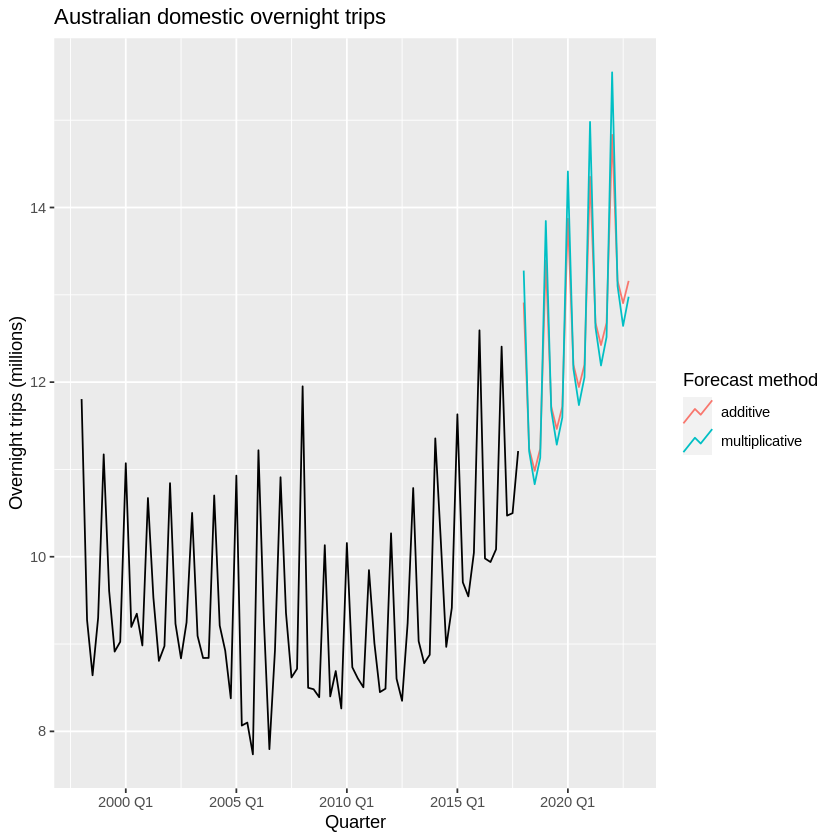

In [ ]:
# Apply ETS model with both trend and seasonality (additive and multiplicative)
holidays <- tourism %>%
  filter(Purpose == "Holiday") %>% summarise(Trips = sum(Trips)/1e3)
  
  fit <- holidays %>% model( 
    additive = ETS(Trips ~ error("A") + trend("A") + season("A")),
    multiplicative = ETS(Trips ~ error("M") + trend("A") + season("M")))

forec <- fit %>% forecast(h = "5 years") # forecast for 2018-2022

forec %>% autoplot(holidays, level = NULL) + labs(title = "Australian domestic overnight trips",
       y = "Overnight trips (millions)") + guides(colour = guide_legend(title = "Forecast method"))

In [ ]:
tidy(fit) # check estimates for both models
accuracy(fit) # check RMSE for both models

.model,term,estimate
<chr>,<chr>,<dbl>
additive,alpha,0.2620381792
additive,beta,0.0431426582
additive,gamma,0.0001000312
additive,l[0],9.7913411604
additive,b[0],0.0210687539
additive,s[0],-0.5344079548
additive,s[-1],-0.6697662134
additive,s[-2],-0.2937801845
additive,s[-3],1.4979543526


.model,.type,ME,RMSE,MAE,MPE,MAPE,MASE,RMSSE,ACF1
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
additive,Training,0.02867567,0.4168762,0.3209553,0.1319804,3.377814,0.7742412,0.7722811,-0.049158517
multiplicative,Training,0.05473254,0.4121669,0.3095759,0.4123685,3.248095,0.7467908,0.7635568,0.003936038


We see obvious seasonal peaks corresponding to Australian summer. The forecasts show both trend and seasonal peaks.

## 3.8. ETS (A,Ad,M) and ETS (M,Ad,M) model
Similar to ETS (A,A,M) and ETS (M,A,M) in section 3.7, Holt-Winters’ damped multipicative method with additive errors and multiplicative errors are denoted as ETS (A, Ad, M) and ETS (M, Ad, M), respectively. 
<br><br>
Here we introduce the Holt-Winters’ damped method, and the ETS models with error terms will be listed later.
Holt-Winters’ damped method is a combination of damped trend shown in section 3.5 and Holt-Winters’ additive or multiplicative method shown in sections 3.6 and 3.7. However, for seasonal data, the method combining damped trend and Holt-Winters’ multiplicative (seasonality) method often provides accurate forecasts. The component form for this method is shown below:
<br>

$$\hat{y}_{t+h|t} = [l_t+ (\phi + \phi^2 +...+ \phi^h) b_t] s_{t+h-m(k+1)}$$
$$l_t= \alpha\frac{y_t}{s_{t-m}}+ (1-\alpha)(l_{t-1}+\phi b_{t-1})$$
$$b_t=\beta^*(l_t-l_{t-1})+(1-\beta^*)\phi b_{t-1}$$
$$s_t=\gamma \frac{y_t}{l_{t-1} -\phi b_{t-1}}) + (1- \gamma)s_{t-m}$$ <br>


The summarized 18 ETS models with additive errors or multiplicative errors are shown in the tables below (adapted from https://robjhyndman.com/uwa2017/2-1-StateSpace.pdf). The models with additive errors and multiplicative errors will produce the same point forecasts if the same smoothing parameters are used but different prediction intervals.

![](https://drive.google.com/uc?id=1Ekt6bW0PjsUuCjP4jYperEYI2bVJr85n)
![](https://drive.google.com/uc?id=12gFb7odOJYXgGXFsmnyjZU92-twCz7aL)

# 4. Estimation and model selection
As mentioned before, a common way to estimate the model parameters is minimizing the sum of squared errors (SSE). Apart from this method, maximum likelihood method can also be used to estimate the parameters. For additive error model, the model parameters obtained using minimized SSE and maximized likelihood are the same assuming the error follows normal distribution. But for multiplicative models, different paramater estimates will be obtained. Here, we use maximum likelihood to estimate smoothing parameters, e.g., $\alpha, \beta, \gamma, \phi $, and initial values $l_0, b_0, s_0, s_{-1},...s_{-m+1}$. 
<br>
To select ETS model, three information criteria can be used: Akaike's Information Criterion (AIC), AIC corrected for small sample bias (AICc), and Bayesian Information Criterion (BIC). The calculation equations are shown below:<br><br>
$$AIC = -2 LOG (L) +2k $$
Where $L$ is the model likelihood, k is the number of parameters (including the initial states and residual variance).
$$AICc=AIC + \frac{2k(k+1)}{T-k-1} $$ <br>
$$BIC = AIC + k[log(T) -2] $$

When selecting the models, certain combination of the three states may cause numerical difficulties. These combinations are the models with multiplictive seasonal component, i.e., ETS (A, N, M),  ETS (A, A, M), and ETS (A, Ad, M). Since there are division in the satte equations, division by values that can be close to zero may cause numerical instability. So these three models are normmally not considered. 

In addition, only when the time series data are all positive, the ETS models with multiplicative errors will be useful. Values that are close to 0 or negetive will also cause numerical instability. Therefore, ETS models with multiplicative errors will not be considered when choosing models unless the time series data is strictly positive. So in this case, there are 6 additive models left to be considered. 

**Example: Model selection for the Australian trip data.**

In [ ]:
holidays <- tourism %>% filter(Purpose == "Holiday") %>% summarise(Trips = sum(Trips)/1e3)
holidays [1:5,]
fitmodel <- holidays %>% model(ETS(Trips))
report(fitmodel)

Quarter,Trips
<qtr>,<dbl>
1998 Q1,11.806038
1998 Q2,9.275662
1998 Q3,8.642489
1998 Q4,9.299524
1999 Q1,11.172027


Series: Trips 
Model: ETS(M,N,A) 
  Smoothing parameters:
    alpha = 0.3484054 
    gamma = 0.0001000018 

  Initial states:
     l[0]       s[0]      s[-1]      s[-2]    s[-3]
 9.727072 -0.5376106 -0.6884343 -0.2933663 1.519411

  sigma^2:  0.0022

     AIC     AICc      BIC 
226.2289 227.7845 242.9031 


We get $\alpha = 0.3484$, $\gamma=0.0001$, $\gamma $ is very small, it indicates the seasonal state changes slightly over time.

Warning message:
“Removed 4 row(s) containing missing values (geom_path).”


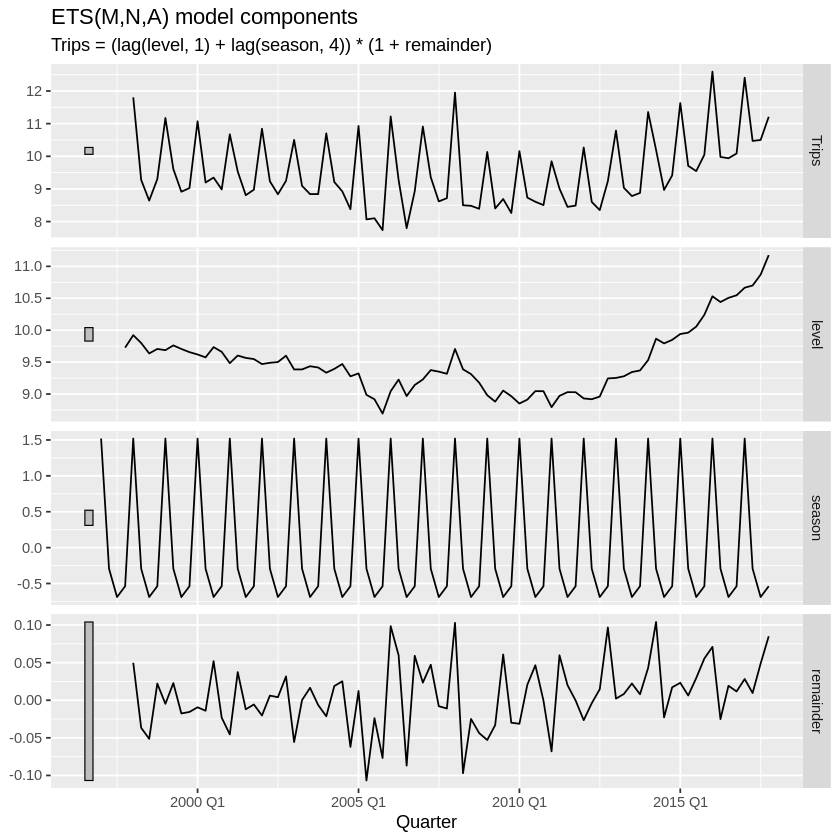

In [ ]:
components(fitmodel) %>% autoplot() + labs(title = "ETS(M,N,A) model components")

# 5. Forecast with ETS models
Using ETS model, we can get both point forecasts and prediction intervals. the point forecasts are calculated by setting all $\varepsilon =0$ when $t>T$ and iterating the model equation for $t=T+1, T+2,..., T+h$. 

For example, for ETS (A, N, N) model, $y_{T+1} = l_{T} + \varepsilon _{T+1}$, so $\hat{y}_{T+1|T} = l_T$, and,
$$ y_{T+2}= l_{T+1} + \varepsilon_ {T+2} =l_ T +\alpha  \varepsilon _{T+1}$$
so, $\hat{y}_{T+2|T} = l_T$. <br>

Similarly, for ETS (M, A, N) model, by iterating, we can get $\hat{y}_{T+1|T}= l_T + b_T$, $\hat{y}_{T+2|T}= l_T + 2b_T$, and so on. 
<br><br>
Point forecasts obtained using the method and its corresponding two models (with additive or multipicative error) are the same, when the same parameters are used. These forecasts are equal to the mean of the forecast distribution, except for models with multiplicative seasonal component. 

**Predicion interval** <br>
The predicion intervals for additive and multiplicative models are different. The predicion intervals for most ETS models can be calcualted as shown below. 
 $$\hat{y}_{T+h|T} \pm c\sigma_h$$
Where $\sigma_h$ is the forecast variance, its calculation for ETS models can be complicated. The table below lists its simple calculations for additive models (Adapted from Hyndman, Rob J., and George Athanasopoulos. Forecasting: principles and practice. OTexts, 2018.). The multipier $c$ depends on the coverage probability, for example,$   c=1.96$ for 95% coverage probability assuming the forecast distribution is normal.
<br>

![](https://drive.google.com/uc?id=1jkuhse0sq6zlB-_QRkn_wH-HDA1lw2Fs)

**Example. Prediction on the Australian overnight trip**

Series: Trips 
Model: ETS(M,N,A) 
  Smoothing parameters:
    alpha = 0.3484054 
    gamma = 0.0001000018 

  Initial states:
     l[0]       s[0]      s[-1]      s[-2]    s[-3]
 9.727072 -0.5376106 -0.6884343 -0.2933663 1.519411

  sigma^2:  0.0022

     AIC     AICc      BIC 
226.2289 227.7845 242.9031 


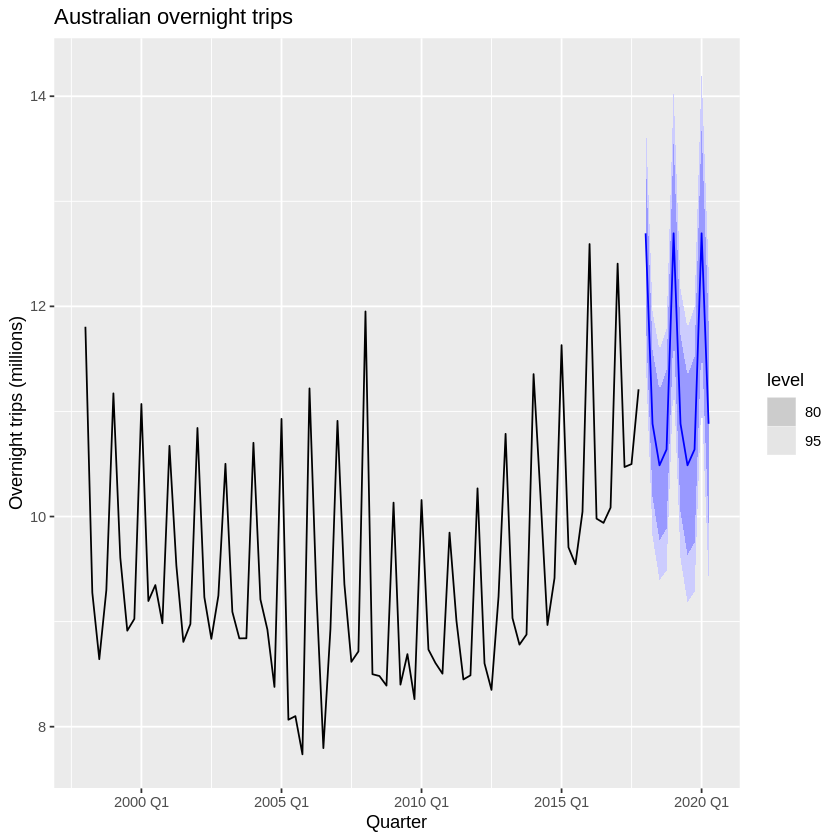

In [ ]:
fit %>% forecast(h = 10) %>% # forecasts for 10 quarters since 2018
  autoplot(holidays)+ labs(title = "Australian overnight trips",
  y = "Overnight trips (millions)")

report(fit) 